In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

In [2]:
! pip install statsmodels

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
#For Linear Regression using StatsModel Package
import statsmodels.api as stm
import scipy.stats as stats
# Linear Regression using Sklearn
import sklearn

In [4]:
cars = pd.read_csv("cars.csv")

In [5]:
# head of data
cars.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


## Objective

### Predict MPG of cars based on the weight of the cars
### Target(Response) Variable - MPG
### Explanatory Variable (Predictors) - Weight,HP

In [6]:
cars.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

### Checking for zero's in MPG and Horsepower
- Scatter plot between HP and MPG

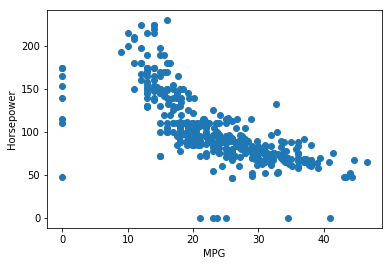

In [7]:
plt.scatter(x = "MPG",y="Horsepower",data=cars)
plt.xlabel("MPG")
plt.ylabel("Horsepower")
plt.show()

In [8]:
## removing the data with zero values
cars2 = cars.loc[(cars['MPG'] !=0) & (cars['Horsepower'] != 0)]

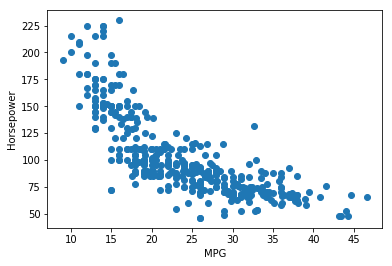

In [9]:
plt.scatter(x = "MPG",y="Horsepower",data=cars2)
plt.xlabel("MPG")
plt.ylabel("Horsepower")
plt.show()

## Scatter plot between HP,Weight,MPG

In [10]:
from pandas.tools.plotting import scatter_matrix

c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


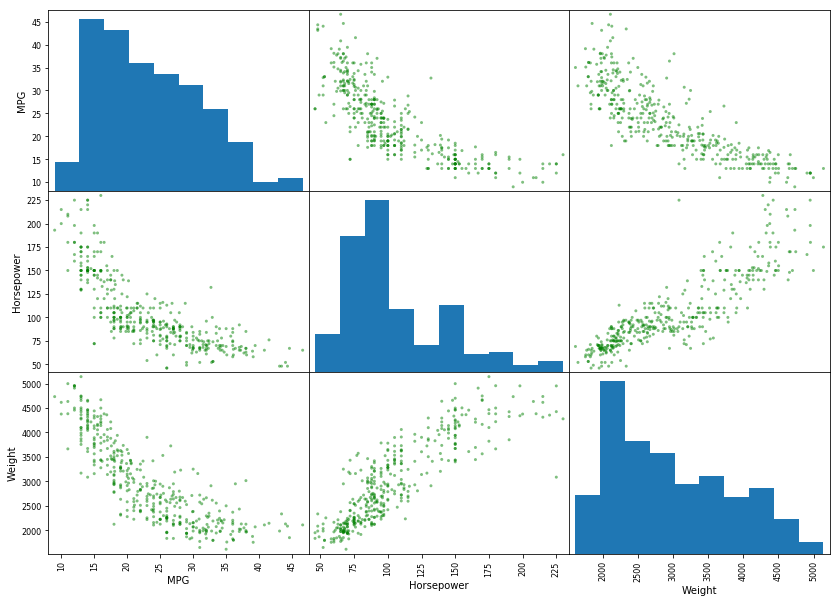

In [11]:
scatter_matrix(cars2[['MPG','Horsepower','Weight']],color = "green", alpha = 0.5, figsize = (14,10),
              diagonal = 'hist')
plt.show()

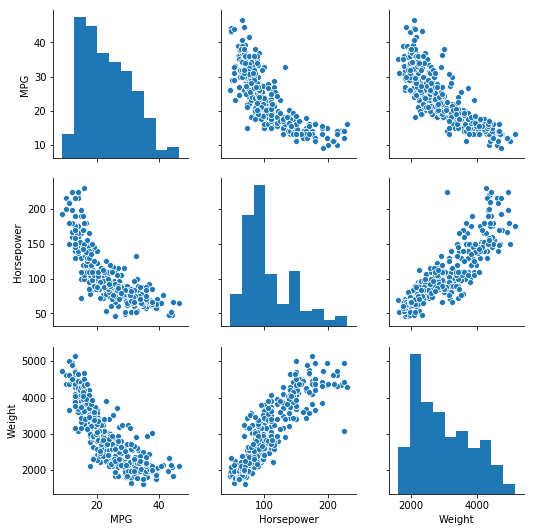

In [12]:
sns.pairplot(cars2[['MPG','Horsepower','Weight']])


In [13]:
cars2[['MPG','Horsepower','Weight']].corr()

,MPG,Horsepower,Weight
MPG,1.000000,-0.778427,-0.832244
Horsepower,-0.778427,1.000000,0.864538
Weight,-0.832244,0.864538,1.000000


## Split Data for Model Fitting and Validation

In [14]:
#randomly divide the data into train (70%) and test(30%)

train = np.random.choice(cars2.index,round(0.7 * len(cars2)),replace=False)

In [15]:
# select the train observations from the main data set corresponding to the train data set
X_train = cars2.loc[train,["Weight",'Horsepower']]
y_train = cars2.loc[train,'MPG']

In [16]:
# Select the test observations from the data set

test = []

for i in cars2.index:
    if i not in train:
        test.append(i)
        
test = np.array(test)

In [17]:
# 4 - Slice the test data

X_test = cars2.loc[test,['Weight','Horsepower']]
y_test = cars2.loc[test,'MPG']

In [18]:
# Adding the constant to get the constant term for model
X_train = stm.add_constant(X_train) 
X_train.head()

,const,Weight,Horsepower
286,1.0,2135,68
90,1.0,2164,80
52,1.0,2962,110
56,1.0,2220,86
182,1.0,1937,70


## Fitting of Model

In [19]:
# OLS Regression
model = stm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     308.4
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.49e-70
Time:                        19:57:58   Log-Likelihood:                -783.83
No. Observations:                 274   AIC:                             1574.
Df Residuals:                     271   BIC:                             1584.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.4154      0.985     46.107      0.0

## Making Predictions using Model (test data)

In [20]:
X_test = stm.add_constant(X_test)
X_test.head()

,const,Weight,Horsepower
0,1.0,3504,130
8,1.0,4425,225
22,1.0,2774,97
32,1.0,4376,200
34,1.0,4732,193


In [21]:
## Prediction 
pred = model.predict(X_test)
pred.head(10)

0     19.016411
8      9.273666
22    24.788934
32    10.711401
34     8.960778
41    20.547326
43    22.128801
48    14.646807
49     8.261293
55    23.078086
dtype: float64

In [22]:
rss = sum((pred - y_test)**2)
rss

2109.612610222923

In [23]:
rmse = np.sqrt(rss/(len(y_test)-2))
rmse

4.264541664161581

## Plotting a Linear Regression Line

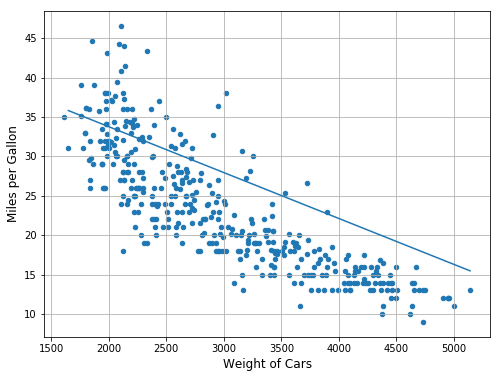

In [24]:
cars2.plot(kind="scatter",x="Weight",y="MPG",figsize=(8,6),grid=True)
plt.ylabel("Miles per Gallon",fontsize=12)
plt.xlabel("Weight of Cars",fontsize = 12)

#Sorted values of weight
Weight = np.sort(X_train.Weight)

#plotting the sorted values of weight with its fitted value
plt.plot(Weight,model.params[0]+model.params[1]*Weight)
plt.show()